# <span style="color:orange"> Exercise 2.1 </span>

## <span style="color:green"> Description </span>
Compute the following 1D integral via Monte Carlo:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

## <span style = "color:green"> Solution </span> 
The simulation is split into a ```main.cpp``` file which executes the integral, a ```random.hpp``` file used to generate pseudo-random numbers and an importance_sampling.py file which creates the image below.
The ```main.cpp``` script first reads all input parameters from the configurational file and stores them for future use.

The second part of the main code runs the simulation, which is divided into the uniform distribution and the importance sampling code blocks. In both cases, the integral is evaluated using two for loops. The external for loop cycles over the number of blocks, while the inner loop cycles over a given number, each time generating a pseudo-random number in [0,1] (integration extrema) and computes the sum of the function evaluated in such number. In the outer for loop, the average is computed and the data-blocking method is called. The results are saved in a file given in the configuration file, under the key of the method used, uniform_file or optimized_file.

The pseudo-random number is generated from a uniform distribution in the first case, while in the second case it follows a distribution which is defined by the user, with the goal of optimizing the random generation. In the latter, the method used is called **importance sampling**.

The chosen distribution is $p(x) = 2(1-x)$, because:
- The area under the curve in the range [0,1] is 1, therefore the distribution is normalized
- The line approximates the integrand better than a constant. Both $p(x)$ and the integrand $f(x)$ decrease in [0,1] and vanish in $x=1$
- The cumulative function of this distribution is easily characterized in the integration range, so that numbers can be sampled from $p(x)$ starting by a uniform distribution.

![Importance Sampling](./media/importancesampling.png)

The following Python script reads the outputs from file using the NumPy library and graphs the estimate of the integral as a function of the number of blocks.

In [1]:
import configparser
import statistics
import sys,os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Markdown as md
from scipy.optimize import curve_fit
from rich.console import Console
console = Console(style="bold blue on white")

Checking array dimensions:   100  --  100  --  100 




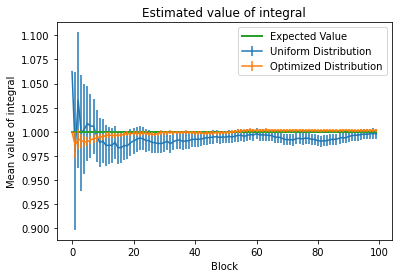

In [2]:
base_dir = "es2.1/"
myconfig = configparser.ConfigParser()
myconfig.read(base_dir+"config.ini")

iterations = int(myconfig["simulation"]["iterations"])
uniform_file = base_dir+str(myconfig["settings"]["uniform_file"])
optimized_file = base_dir+str(myconfig["settings"]["optimized_file"])

i, integrals, errors = np.loadtxt(uniform_file,delimiter="\t",usecols=(0,1,2),unpack=True)
i2, integrals2, errors2 = np.loadtxt(optimized_file,delimiter="\t",usecols=(0,1,2),unpack=True)

print("Checking array dimensions:  ",len(i)," -- ",len(integrals)," -- ",len(errors),"\n\n")
plt.title("Estimated value of integral")
plt.xlabel("Block")
plt.ylabel("Mean value of integral")
plt.errorbar(i,integrals,yerr=errors,label="Uniform Distribution",zorder=1)
plt.errorbar(i2,integrals2,yerr=errors2,label="Optimized Distribution",zorder=20)
plt.plot(i,[1.0 for i in range(len(i))],label="Expected Value",linewidth=2,zorder=10)
plt.legend()
plt.show()

## <span style="color:green"> Results </span>
As expected, the estimates of the integral are more precise with imporance sampling, even with fewer number of blocks. Clearly the results by sampling $p(x)$ also converge to the expected value much faster.<br><br>

# <span style="color:orange"> Exercise 2.2 </span>

## <span style="color:green"> Task </span>
    
Repeat many times the simulation of a random walk in 3D always starting at the origin:
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?
  
## <span style="color:green"> Taking a step </span>

A random walk is a stochastic process that describes a path that consists of a succession of random steps on some mathematical space. In our case, the space is firstly a three-dimentional cubic lattice, and the steps can be made in one of the three discrete directions x,y,z in both ways: backwards or forwards. For the second case, the space is $\mathbb{R}^3$, so that the steps are made in a random direction, as long as the norm is 1.

![Cubic Lattice](./media/cubic_lattice.png)


## <span style="color:green"> Solution </span>
Firstly the random number generator is initialized, together with a function that defines how a step should be taken for a random walk. The main starts by reading all configurational parameters for the simulation and initializing all essential vectors, where the distances from the origin for each step are saved.

Then, \<N\> (e.g. $10^4$) random walks centered in the origin are computed, each composed of \<nsteps\> (e.g. $10^2$) number of steps, taken according to the previously-defined function. At each step $i\in[0,nsteps]$, the distance covered from the origin and its value squared are summed. After all iterations are completed, for each step, the average over all walks and the error (using the propagation of uncertainties) are evaluated and then saved to a file.

This process is repeated twice, for a discrete random walk on a cubic lattice and in the continuum.
The following Python script shows the estimate of the distance covered from the origin as a function of the number of steps taken.

<br>

In [3]:
base_dir = "es2.2/"
filename = base_dir+"config.ini"
myc = configparser.ConfigParser()
myc.read(filename)

runs = int(myc["simulation"]["iterations"])
steps = int(myc["simulation"]["steps"])
rw = ["discrete","continuous"]
results_dir = base_dir+"outputs/"

# fit function
def f(x,k):
    return k*np.sqrt(x)

def f2(x,k,a):
    return k*pow(x,a)

#########################  Discrete step on lattice  #########################

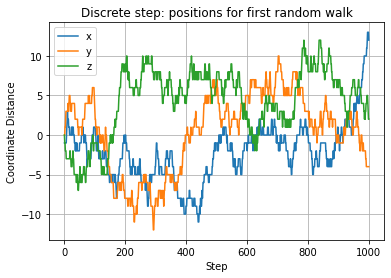

Using power law fit f(x)=kx^a
optimized parameters: k=0.9948226578462437  a=0.5003660597371888
parameters uncertainty:  [6.28215472e-04 9.82412368e-05]


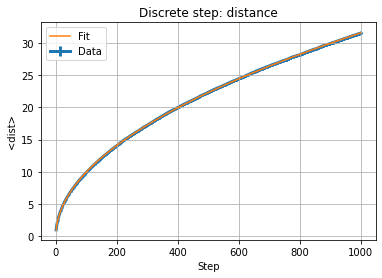

In [4]:
# DISCRETE
console.print("#########################  Discrete step on lattice  #########################")
i, r, err = np.loadtxt(results_dir+"discrete_results.dat",delimiter="\t",unpack=True)
x, y, z, dist = np.loadtxt(results_dir+"discrete_pos.dat",delimiter="\t",unpack=True)

p_opt, p_cov = curve_fit(f2, i, r)
y_fit = f2(i,p_opt[0],p_opt[1])

plt.title("Discrete step: positions for first random walk")
plt.xlabel("Step")
plt.ylabel("Coordinate Distance")
plt.grid(True)
plt.plot(i,x,label="x")
plt.plot(i,y,label="y")
plt.plot(i,z,label="z")
plt.legend()
plt.show()

plt.title("Discrete step: distance")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel("<dist>")
plt.errorbar(i,r,yerr=err,label="Data",linewidth=3,zorder=0)
plt.plot(i,y_fit,label="Fit",linewidth=1.5,zorder=5)
print("Using power law fit f(x)=kx^a")
print(f"optimized parameters: k={p_opt[0]}  a={p_opt[1]}",)
print("parameters uncertainty: ",np.sqrt(np.diagonal(p_cov)))
plt.legend()
plt.show()

#########################  Continuous step in 3D space  #########################

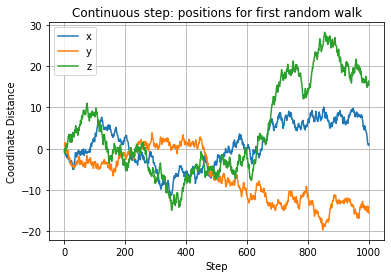

Using power law fit f(x)=kx^a
optimized parameters: k=1.0046769344208875  a=0.49868788249752627
parameters uncertainty:  [5.34667132e-04 8.28018580e-05]


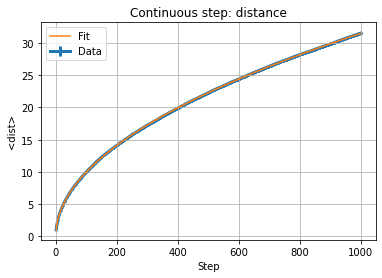

In [5]:
# CONTINUOUS
console.print("#########################  Continuous step in 3D space  #########################")
i, r, err = np.loadtxt(results_dir+"continuous_results.dat",delimiter="\t",unpack=True)
x, y, z, dist = np.loadtxt(results_dir+"continuous_pos.dat",delimiter="\t",unpack=True)

p_opt, p_cov = curve_fit(f2, i, r)
y_fit = f2(i,p_opt[0],p_opt[1])

plt.title("Continuous step: positions for first random walk")
plt.xlabel("Step")
plt.ylabel("Coordinate Distance")
plt.grid(True)
plt.plot(i,x,label="x")
plt.plot(i,y,label="y")
plt.plot(i,z,label="z")
plt.legend()
plt.show()

plt.title("Continuous step: distance")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel("<dist>")
plt.errorbar(i,r,yerr=err,label="Data",linewidth=3,zorder=0)
plt.plot(i,y_fit,label="Fit",linewidth=1.5,zorder=5)
print("Using power law fit f(x)=kx^a")
print(f"optimized parameters: k={p_opt[0]}  a={p_opt[1]}",)
print("parameters uncertainty: ",np.sqrt(np.diagonal(p_cov)))
plt.legend()
plt.show()

## <span style="color:green"> Results </span>
As shown by the graphs, the distance covered from the origin as a function of the steps taken perfectly follows a power law $f(x) = kx^a$ with $a\simeq 0.5$, or a squared-root law, which translates into a diffusive behaviour of the considered particle.